In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from scipy import stats

In [6]:
data = pd.read_csv('Статистика за 2018 год.csv', encoding='cp1251') 

In [86]:
data.head(3)

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B


# Задание 1

Сотрудник службы оценки качества продукции заметил,  
    - что число бракованных листов стали в партии для стали марки A больше, чем для стали марки B.   
    - Также он обратил внимание, что при средней скорости прокатки более 4 м/с число бракованных листов больше.

В соответствии с этими наблюдениями, предлагается снизить скорость прокатки и ввести дополнительные меры контроля качества для стали марки A.

# Число бракованных листов стали в партии для стали марки A больше, чем для стали марки B

#### графики распределения числа бракованных листов в зависимости от марки

Text(0.5, 1.0, 'число бракованных листов стали в партии для стали марки A')

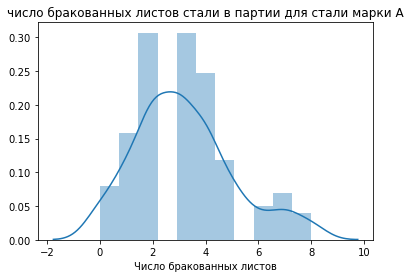

In [9]:
sns.distplot(data[data['Марка стали'] == 'A' ]['Число бракованных листов'])
plt.title("число бракованных листов стали в партии для стали марки A")

Text(0.5, 1.0, 'число бракованных листов стали в партии для стали марки A')

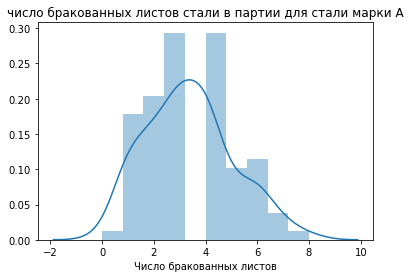

In [12]:
sns.distplot(data[data['Марка стали'] == 'B' ]['Число бракованных листов'])
plt.title("число бракованных листов стали в партии для стали марки A")

Можно визуально оценить, что для марки стали В распределние смещено в парвую сторону,
в сторону больших значений брака

#### Среднее значение и значение доверительного интервала для стали марки А

In [22]:
def my_norm_confidence_95(df=data[data['Марка стали'] == 'A' ], column = 'Число бракованных листов' , alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval
confidence = my_norm_confidence_95()
print(confidence)

(-0.5227989129013668, 6.882511143117195)


In [28]:
mean_A = data[data['Марка стали'] == 'A' ]['Число бракованных листов'].mean()
print("среднее для A ", mean_A)

среднее для A  3.179856115107914


Text(0.5, 1.0, 'Доверительный интервал')

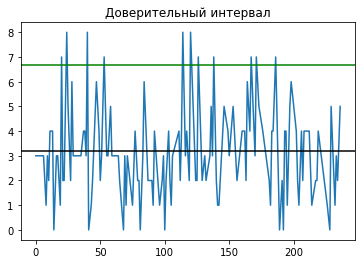

In [31]:
data[data['Марка стали'] == 'A']['Число бракованных листов'].plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
#plt.axhline(y=confidence[0], color="r", linestyle="-") эта граница не так интересна
plt.axhline(y= mean_A, color="black", linestyle="-")
plt.title("Доверительный интервал")

#### Среднее значение и значение доверительного интервала для  стали марки B

(0.0565994836524264, 6.6780943938985935)
среднее для В  3.36734693877551


Text(0.5, 1.0, 'Доверительный интервал')

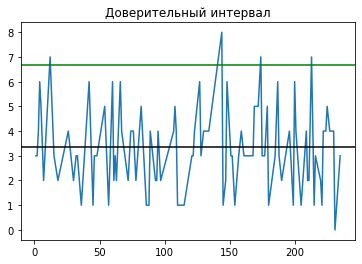

In [29]:
def my_norm_confidence_95(df=data[data['Марка стали'] == 'B' ], column = 'Число бракованных листов' , alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval
confidence = my_norm_confidence_95()
print(confidence)

mean_B = data[data['Марка стали'] == 'B' ]['Число бракованных листов'].mean()
print("среднее для В ", mean_B)

data[data['Марка стали'] == 'B']['Число бракованных листов'].plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
#plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.axhline(y= mean_B, color="black", linestyle="-")
plt.title("Доверительный интервал")

#### Jarque-Bera test - не линейность распредления -принятие или не принятие среднего значения

In [33]:
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable

In [34]:
jb_test = sm.stats.stattools.jarque_bera(data[data['Марка стали'] == 'A' ]['Число бракованных листов'])

In [35]:
jb_test

(8.551994885976791,
 0.013898179161684909,
 0.6067065891837974,
 3.065052994656672)

In [37]:
jb_test_B = sm.stats.stattools.jarque_bera(data[data['Марка стали'] == 'B' ]['Число бракованных листов'])

In [38]:
jb_test_B

(2.9037075231661174,
 0.23413585349869248,
 0.3915515992349631,
 2.6871718889935994)

можно сказать, что обa значения распредeлены не по закону нормального распределения поэтому не будем использовать среднее значение для сравнения брака 

0,0139 и 0,234 - p-value

0,6 и 0,39 - ассиметрия

3,065 и 2,687 - экcцсесс

# Вывод 1
Учитывая это можно сказать, что для значений выпадение брака в доверительном интервале 95% для марки А(6,88) выше чем для марки В (6,68), что и было подмечено специалистами.

# Задача ...при средней скорости прокатки более 4 м/с число бракованных листов больше

In [87]:
data.head(3)

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B


долго через группбай

In [73]:
serias_A_more_4 = data[data['Скорость прокатки'] > 4].groupby('Марка стали')['Число бракованных листов'].mean()

In [42]:
df_A_more_4 = pd.DataFrame(serias_A_more_4)

In [43]:
df_A_more_4 = df_A_more_4.reset_index()

In [50]:
df_A_more_4['при скорости более 4 м/с'] = df_A_more_4['Число бракованных листов']

In [45]:
serias_A_less_4 = data[data['Скорость прокатки'] < 4].groupby('Марка стали')['Число бракованных листов'].mean()

In [46]:
df_A_less_4 = pd.DataFrame(serias_A_less_4)

In [47]:
df_A_less_4 = df_A_less_4.reset_index()

In [49]:
df_A_less_4['при скорости менее 4 м/с'] = df_A_less_4['Число бракованных листов']

In [52]:
df = df_A_more_4.merge(df_A_less_4, how = 'left', on = 'Марка стали')

In [57]:
df = df.drop(['Число бракованных листов_x','Число бракованных листов_y'],1)

In [58]:
df

,Марка стали,при скорости более 4 м/с,при скорости менее 4 м/с
0,A,3.210000,3.333333
1,B,3.455696,2.764706


In [64]:
serias_less_4 = data[data['Скорость прокатки'] < 4].groupby('Марка стали')\
                                             ['Число бракованных листов'].quantile(0.95)

In [65]:
serias_more_4 = data[data['Скорость прокатки'] > 4].groupby('Марка стали')\
                                             ['Число бракованных листов'].quantile(0.95)

In [68]:
serias_less_4

Марка стали
A    7.0
B    4.0
Name: Число бракованных листов, dtype: float64

In [69]:
serias_more_4

Марка стали
A    7.0
B    6.1
Name: Число бракованных листов, dtype: float64

In [70]:
df = df.merge(serias_less_4, how = 'left', on = 'Марка стали')

,Марка стали,при скорости более 4 м/с,при скорости менее 4 м/с,Число бракованных листов
0,A,3.210000,3.333333,7.0
1,B,3.455696,2.764706,4.0


быстро через дескрайб

In [81]:
df_more_4 = data[(data['Скорость прокатки'] > 4) & (data['Марка стали'] == 'A')].describe()

In [80]:
df_less_4 = data[(data['Скорость прокатки'] < 4) & (data['Марка стали'] == 'A')].describe()

In [85]:
df_more_4

,Число бракованных листов,Скорость прокатки
count,100.000000,100.000000
mean,3.210000,4.797000
std,1.843882,0.491021
min,0.000000,4.100000
25%,2.000000,4.400000
50%,3.000000,4.700000
75%,4.000000,5.100000
max,8.000000,6.200000


In [84]:
df_less_4

,Число бракованных листов,Скорость прокатки
count,30.000000,30.000000
mean,3.333333,3.546667
std,1.899788,0.297962
min,0.000000,2.800000
25%,2.000000,3.325000
50%,3.000000,3.600000
75%,4.000000,3.800000
max,8.000000,3.900000


# Вывод 2

Для марки стали А
- при скорости более 4 м/с среднее число бракованных листов равно 3,21.
- при скорости менее 4 м/с среднее число бракованных листов равно 3,33.
      Можно утверждать, что поддержание скорости не ниже 4 м/с позволит
      снизить количество бракованных листов на 3,7 %, что для рассматриваемого
      примера сократило бы количество брака на 4 листа.

к расчету эффекта

In [92]:
# эффект от скорости
n = 100*3.33/3.21-100
n

3.738317757009341

In [93]:
# средняя скорость для марки А
data[data['Марка стали'] == 'A']['Скорость прокатки'].mean()

4.475539568345325

In [94]:
data[data['Марка стали'] == 'A']['Скорость прокатки'].describe()

count    139.000000
mean       4.475540
std        0.684703
min        2.800000
25%        4.000000
50%        4.600000
75%        4.900000
max        6.200000
Name: Скорость прокатки, dtype: float64

In [100]:
fail = data[(data['Скорость прокатки'] < 4) & (data['Марка стали'] == 'A')]['Число бракованных листов'].sum()

In [106]:
boost = np.round(fail*n/100,0)

In [107]:
boost

4.0